In [1]:
import matplotlib.pyplot as plt
import pandas as pd
#%matplotlib inline

In [2]:
unrate = pd.read_csv("unrate.csv")
unrate["DATE"] = pd.to_datetime(unrate["DATE"], format='%d/%m/%Y')

Text(0.5, 1.0, 'Monthly Unemployment Trends, 1948')

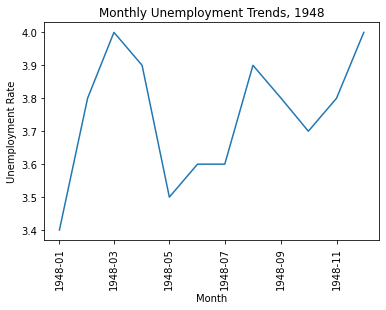

In [3]:
plt.plot(unrate["DATE"].head(12), unrate["VALUE"].head(12))
plt.xticks(rotation = 90)
plt.xlabel("Month")
plt.ylabel("Unemployment Rate")
plt.title("Monthly Unemployment Trends, 1948")

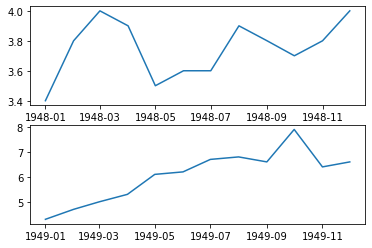

In [4]:
# can manually create a figure by calling pyplot.figure()
fig = plt.figure()
# add subplots to the figure:
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
ax1.plot(unrate[0:12]['DATE'], unrate[0:12]['VALUE'])
ax2.plot(unrate[12:24]['DATE'], unrate[12:24]['VALUE'])
plt.show()

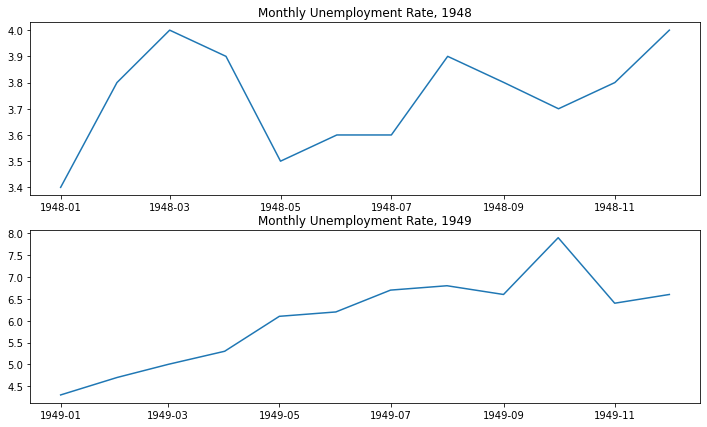

In [5]:
fig = plt.figure(figsize = (12, 7)) # adjust the figure width, height using the figsize parameter
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.plot(unrate[0:12]['DATE'], unrate[0:12]['VALUE'])
ax1.set_title('Monthly Unemployment Rate, 1948')
ax2.plot(unrate[12:24]['DATE'], unrate[12:24]['VALUE'])
ax2.set_title('Monthly Unemployment Rate, 1949')
plt.show()

In [6]:
for i in range(5):
    print(i)

0
1
2
3
4


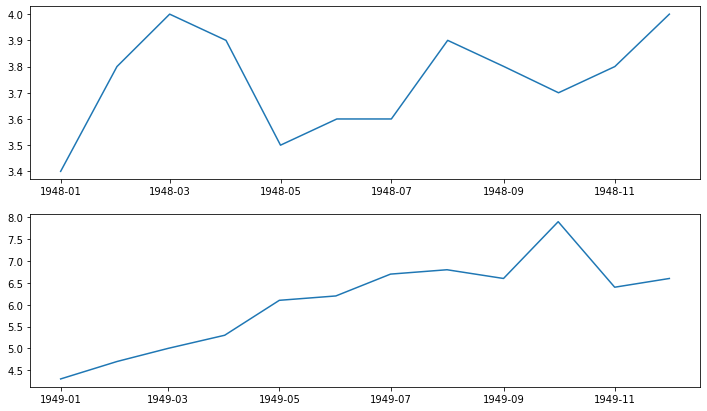

In [7]:
# can use a loop and range() to generate multiple plots:
# to generate values for the loop, use range(), which produced a list of numbers (sequence of integers) e.g. to produce similar to above:

fig = plt.figure(figsize = (12, 7))

for i in range(2):
    ax = fig.add_subplot(2, 1, i+1)
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    ax.plot(subset["DATE"], subset["VALUE"])

plt.show()

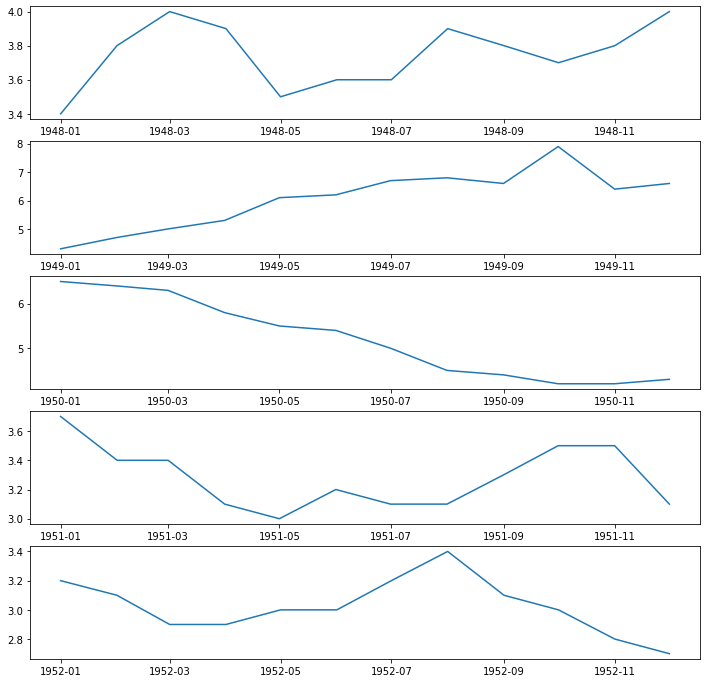

In [8]:
# Let's use this technique to plot five years of data.
fig = plt.figure(figsize=(12, 12))

for i in range(5):
    ax = fig.add_subplot(5, 1, i+1)
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    ax.plot(subset["DATE"], subset["VALUE"])
    
plt.show()

Will now add multiple lines to one plot.

We can handle the visual overhead each additional plot adds by overlaying the line charts in a single subplot. If we remove the year from the x-axis and just keep the month values, we can use the same x-axis values to plot all of the lines. First, we'll explore how to extract just the month values from the DATE column, then we'll dive into generating multiple plots on the same coordinate grid.

To extract the month values from the DATE column and assign them to a new column, we can use the pandas.Series.dt accessor:

In [9]:
unrate["MONTH"] = unrate["DATE"].dt.month

In [10]:
unrate.head(20)

DATE  VALUE  MONTH
0  1948-01-01    3.4      1
1  1948-02-01    3.8      2
2  1948-03-01    4.0      3
3  1948-04-01    3.9      4
4  1948-05-01    3.5      5
5  1948-06-01    3.6      6
6  1948-07-01    3.6      7
7  1948-08-01    3.9      8
8  1948-09-01    3.8      9
9  1948-10-01    3.7     10
10 1948-11-01    3.8     11
11 1948-12-01    4.0     12
12 1949-01-01    4.3      1
13 1949-02-01    4.7      2
14 1949-03-01    5.0      3
15 1949-04-01    5.3      4
16 1949-05-01    6.1      5
17 1949-06-01    6.2      6
18 1949-07-01    6.7      7
19 1949-08-01    6.8      8

In the last mission, we called pyplot.plot() to generate a single line chart. Under the hood, matplotlib created a figure and a single subplot for this line chart. If we call pyplot.plot() multiple times, matplotlib will generate the line charts on the single subplot

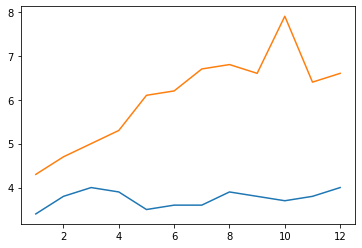

In [11]:
plt.plot(unrate[0:12]['MONTH'], unrate[0:12]['VALUE'])
plt.plot(unrate[12:24]['MONTH'], unrate[12:24]['VALUE'])

If we want to set the dimensions for the plotting area, we can create the figure ourselves first then plot the data. This is because matplotlib first checks if a figure already exists before plotting data. It will only create one if we didn't create a figure.

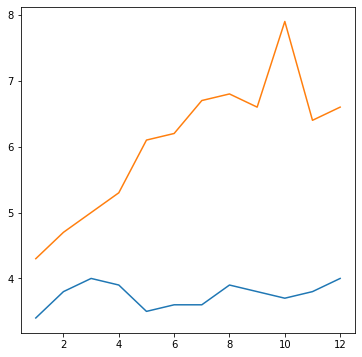

In [12]:
fig = plt.figure(figsize=(6,6))
plt.plot(unrate[0:12]['MONTH'], unrate[0:12]['VALUE'])
plt.plot(unrate[12:24]['MONTH'], unrate[12:24]['VALUE'])

By default, matplotlib will select a different color for each line. To specify the color ourselves, use the c parameter when calling plot():

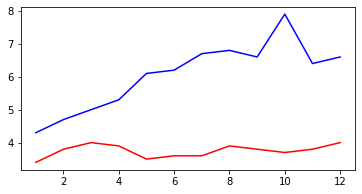

In [13]:
fig = plt.figure(figsize=(6,3))
plt.plot(unrate[0:12]['MONTH'], unrate[0:12]['VALUE'], c = "red")
plt.plot(unrate[12:24]['MONTH'], unrate[12:24]['VALUE'], c = "blue")
plt.show()

Let's visualize 5 years worth of unemployment rates on the same subplot.

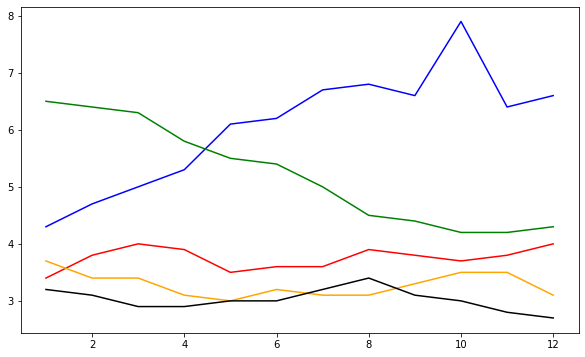

In [14]:
fig = plt.figure(figsize=(10,6))
colours = ['red', 'blue', 'green', 'orange', 'black']

for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    plt.plot(subset["MONTH"], subset["VALUE"], c = colours[i])

plt.show()

To help remind us which year each line corresponds to, we can add a legend that links each color to the year the line is representing.
When we generate each line chart, we need to specify the text label we want each color linked to. The pyplot.plot() function contains a label parameter, which we use to set the year value.

We can create the legend using pyplot.legend and specify its location using the loc parameter.

If we're instead working with multiple subplots, we can create a legend for each subplot by mirroring the steps for each subplot. When we use plt.plot() and plt.legend(), the Axes.plot() and Axes.legend() methods are called under the hood and parameters passed to the calls. When we need to create a legend for each subplot, we can use Axes.legend() instead.

Let's now add a legend for the plot we generated in the last screen.

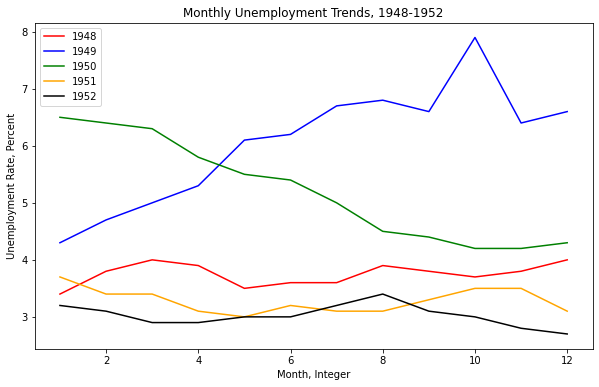

In [15]:
fig = plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green', 'orange', 'black']

for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    label = str(1948 + i)
    plt.plot(subset['MONTH'], subset['VALUE'], c=colors[i], label=label)
    
plt.legend(loc = 'upper left')
plt.title("Monthly Unemployment Trends, 1948-1952")
plt.xlabel("Month, Integer")
plt.ylabel("Unemployment Rate, Percent")
plt.show()

Now we will look at bar plots and scatter plots using the fandango data.

In [16]:
reviews = pd.read_csv("fandango_scores.csv")

#reviews.head()

norm_reviews = reviews[["FILM", "RT_user_norm", "Metacritic_user_nom", "IMDB_norm", "Fandango_Ratingvalue", "Fandango_Stars"]]

norm_reviews.head(10)

FILM  RT_user_norm  Metacritic_user_nom  \
0  Avengers: Age of Ultron (2015)          4.30                 3.55   
1               Cinderella (2015)          4.00                 3.75   
2                  Ant-Man (2015)          4.50                 4.05   
3          Do You Believe? (2015)          4.20                 2.35   
4   Hot Tub Time Machine 2 (2015)          1.40                 1.70   
5        The Water Diviner (2015)          3.10                 3.40   
6           Irrational Man (2015)          2.65                 3.80   
7                 Top Five (2014)          3.20                 3.40   
8    Shaun the Sheep Movie (2015)          4.10                 4.40   
9             Love & Mercy (2015)          4.35                 4.25   

   IMDB_norm  Fandango_Ratingvalue  Fandango_Stars  
0       3.90                   4.5             5.0  
1       3.55                   4.5             5.0  
2       3.90                   4.5             5.0  
3       2.70                   4.5             5.0  
4       2.55                   3.0             3.5  
5       3.60                   4.0             4.5  
6       3.45                   3.5             4.0  
7       3.25                   3.5             4.0  
8       3.70                   4.0             4.5  
9       3.90                   4.0             4.5

We can use pyplot.subplots() to first generate a single subplot and return both the Figure and Axes object. This is a shortcut from the technique we used in the previous mission:
fig, ax = plt.subplots()

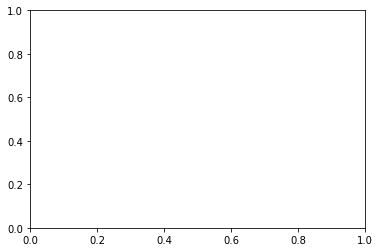

In [17]:
fig, ax = plt.subplots()

The Axes.bar() method has 2 required parameters, left and height. We use the left parameter to specify the x coordinates of the left sides of the bar (marked in blue on the above image) (Note that recent versions of Matplotlib use a modified syntax, substituting the parameter xfor the parameter left). We use the height parameter to specify the height of each bar. Both of these parameters accept a list-like object.

The np.arange() function returns evenly spaced values. We use arange() to generate the positions of the left side of our bars. This function requires a parameter that specifies the number of values we want to generate. We'll also want to add space between our bars for better readability

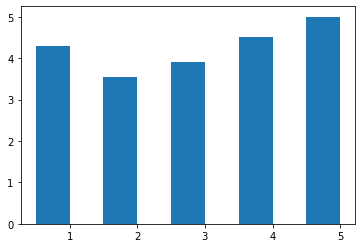

In [18]:
# Positions of the left sides of the 5 bars. [0.75, 1.75, 2.75, 3.75, 4.75]
from numpy import arange
bar_positions = arange(5) + 0.75

# Heights of the bars.  In our case, the average rating for the first movie in the dataset.

num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
bar_heights = norm_reviews[num_cols].iloc[0].values
#plot
fig, ax = plt.subplots()
#We can also use the width parameter to specify the width of each bar. This is an optional parameter and the width of each bar is set to 0.8 by default. The following code sets the width parameter to 1.5
ax.bar(bar_positions, bar_heights, 0.5)
plt.show()

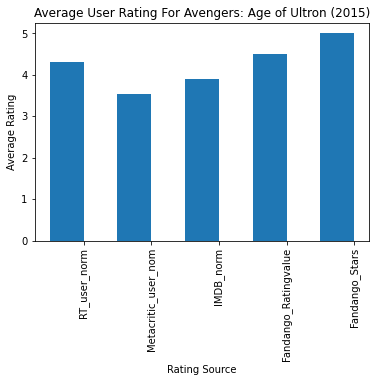

In [19]:
# more customisation

num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
bar_heights = norm_reviews[num_cols].iloc[0].values
bar_positions = arange(5) + 0.75
tick_positions = range(1,6)

fig, ax = plt.subplots()

ax.bar(bar_positions, bar_heights, 0.5)
ax.set_xticks(tick_positions)
ax.set_xticklabels(num_cols, rotation=90)
ax.set_xlabel("Rating Source")
ax.set_ylabel("Average Rating")
ax.set_title("Average User Rating For Avengers: Age of Ultron (2015)")


plt.show()

We can create a horizontal bar plot in matplotlib in a similar fashion. Instead of using Axes.bar(), we use Axes.barh(). This method has 2 required parameters, bottom and width. We use the bottom parameter to specify the y coordinate for the bottom sides for the bars and the width parameter to specify the lengths of the bars:

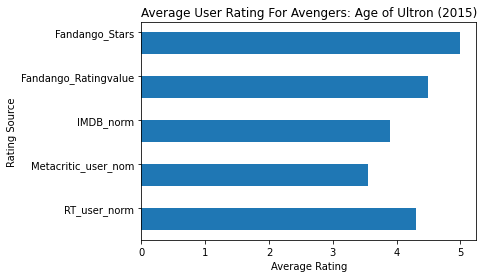

In [20]:
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']

bar_widths = norm_reviews[num_cols].iloc[0].values
bar_positions = arange(5) + 0.75
tick_positions = range(1,6)

fig, ax = plt.subplots()

ax.barh(bar_positions, bar_widths, 0.5)
ax.set_yticks(tick_positions)
ax.set_yticklabels(num_cols)
ax.set_ylabel("Rating Source")
ax.set_xlabel("Average Rating")
ax.set_title("Average User Rating For Avengers: Age of Ultron (2015)")

plt.show()

Scatter plot

To generate a scatter plot, we use Axes.scatter(). The scatter() method has 2 required parameters, x and y, which matches the parameters of the plot() method. The values for these parameters need to be iterable objects of matching lengths (lists, NumPy arrays, or pandas series)

Let's start by creating a scatter plot that visualizes the relationship between the Fandango_Ratingvalue and RT_user_norm columns. We're looking for at least a weak correlation between the columns.

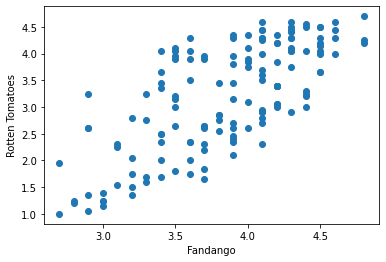

In [21]:
fig, ax = plt.subplots()

ax.scatter(norm_reviews["Fandango_Ratingvalue"], norm_reviews["RT_user_norm"])
ax.set_xlabel("Fandango")
ax.set_ylabel("Rotten Tomatoes")

plt.show()

The scatter plot suggests that there's a weak, positive correlation between the user ratings on Fandango and the user ratings on Rotten Tomatoes. The correlation is weak because for many x values, there are multiple corresponding y values. The correlation is positive because, in general, as x increases, y also increases.

When using scatter plots to understand how 2 variables are correlated, it's usually not important which one is on the x-axis and which one is on the y-axis. This is because the relationship is still captured either way, even if the plots look a little different. If you want to instead understand how an independent variable affects a dependent variables, you want to put the independent one on the x-axis and the dependent one on the y-axis. Doing so helps emphasize the potential cause and effect relation.

In our case, we're not exploring if the ratings from Fandango influence those on Rotten Tomatoes and we're instead looking to understand how much they agree. Let's see what happens when we flip the columns.

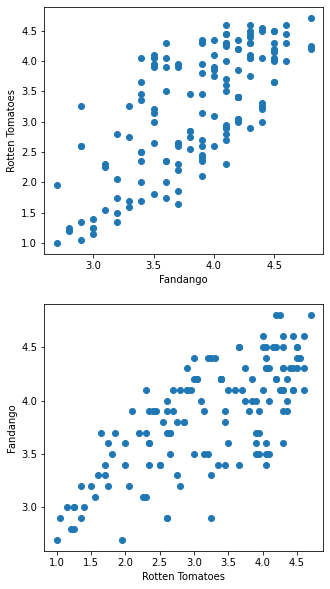

In [22]:
fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
reviews = pd.read_csv('fandango_scores.csv')
cols = ['FILM', 'RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
norm_reviews = reviews[cols]

ax1.scatter(norm_reviews["Fandango_Ratingvalue"], norm_reviews["RT_user_norm"])
ax1.set_xlabel("Fandango")
ax1.set_ylabel("Rotten Tomatoes")

ax2.scatter(norm_reviews["RT_user_norm"], norm_reviews["Fandango_Ratingvalue"])
ax2.set_xlabel("Rotten Tomatoes")
ax2.set_ylabel("Fandango")

plt.show()

The second scatter plot is a mirror reflection of the first scatter plot. The nature of the correlation is still reflected, however, which is the important thing. Let's now generate scatter plots to see how Fandango ratings correlate with all 3 of the other review sites.

When generating multiple scatter plots for the purpose of comparison, it's important that all plots share the same ranges in the x-axis and y-axis. In the 2 plots we generated in the last step, the ranges for both axes didn't match. We can use Axes.set_xlim() and Axes.set_ylim() to set the data limits for both axes

By default, matplotlib uses the minimal ranges for the data limits necessary to display all of the data we specify. By manually setting the data limits ranges to specific ranges for all plots, we're ensuring that we can accurately compare. We can even use the methods we just mentioned to zoom in on a part of the plots. For example, the following code will limit the axes to the 4 to 5 range:

ax.set_xlim(4, 5)
ax.set_ylim(4, 5)

This makes small changes in the actual values in the data appear larger in the plot. A difference of 0.1 in a plot that ranges from 0 to 5 is hard to visually observe. A difference of 0.1 in a plot that only ranges from 4 to 5 is easily visible since the difference is 1/10th of the range.


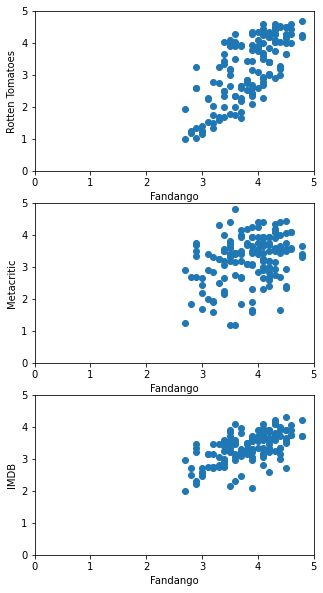

In [23]:
fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.scatter(norm_reviews["Fandango_Ratingvalue"], norm_reviews["RT_user_norm"])
ax1.set_xlabel("Fandango")
ax1.set_ylabel("Rotten Tomatoes")
ax1.set_xlim(0, 5)
ax1.set_ylim(0, 5)

ax2.scatter(norm_reviews["Fandango_Ratingvalue"], norm_reviews["Metacritic_user_nom"])
ax2.set_xlabel("Fandango")
ax2.set_ylabel("Metacritic")
ax2.set_xlim(0, 5)
ax2.set_ylim(0, 5)


ax3.scatter(norm_reviews["Fandango_Ratingvalue"], norm_reviews["IMDB_norm"])
ax3.set_xlabel("Fandango")
ax3.set_ylabel("IMDB")
ax3.set_xlim(0, 5)
ax3.set_ylim(0, 5)

plt.show()

From the scatter plots, we can conclude that user ratings from Metacritic and Rotten Tomatoes span a larger range of values than those from IMDB or Fandango. User ratings from Metacritic and Rotten Tomatoes range from 1 to 5. User ratings from Fandango range approximately from 2.5 to 5 while those from IMDB range approximately from 2 to 4.5.

The scatter plots unfortunately only give us a cursory understanding of the distributions of user ratings from each review site. For example, if a hundred movies had the same average user rating from IMDB and Fandango in the dataset, we would only see a single marker in the scatter plot. In the next mission, we'll learn about two types of plots that help us understand distributions of values.

Historgams and box plots

In [24]:
norm_reviews.head()

FILM  RT_user_norm  Metacritic_user_nom  \
0  Avengers: Age of Ultron (2015)           4.3                 3.55   
1               Cinderella (2015)           4.0                 3.75   
2                  Ant-Man (2015)           4.5                 4.05   
3          Do You Believe? (2015)           4.2                 2.35   
4   Hot Tub Time Machine 2 (2015)           1.4                 1.70   

   IMDB_norm  Fandango_Ratingvalue  Fandango_Stars  
0       3.90                   4.5             5.0  
1       3.55                   4.5             5.0  
2       3.90                   4.5             5.0  
3       2.70                   4.5             5.0  
4       2.55                   3.0             3.5

Let's first compare the frequency distributions of user ratings from Fandango with those from IMDB using tables. A column's frequency distribution consists of the unique values in that column along with the count for each of those values (or their frequency). We can use Series.value_counts() to return the frequency distribution as Series object:

In [25]:
freq_counts = norm_reviews["Fandango_Ratingvalue"].value_counts()
#The resulting Series object will be sorted by frequency in descending order
freq_counts

4.1    16
4.2    12
3.9    12
4.3    11
3.7     9
3.5     9
4.5     9
3.4     9
3.6     8
4.4     7
4.0     7
3.2     5
2.9     5
3.8     5
3.3     4
4.6     4
3.0     4
4.8     3
3.1     3
2.8     2
2.7     2
Name: Fandango_Ratingvalue, dtype: int64

In [26]:
#sort the frequency distribution in ascending order by the values in the column
sorted_freq_counts = freq_counts.sort_index()
sorted_freq_counts

2.7     2
2.8     2
2.9     5
3.0     4
3.1     3
3.2     5
3.3     4
3.4     9
3.5     9
3.6     8
3.7     9
3.8     5
3.9    12
4.0     7
4.1    16
4.2    12
4.3    11
4.4     7
4.5     9
4.6     4
4.8     3
Name: Fandango_Ratingvalue, dtype: int64

In [27]:
# can also method string:
imdb_distribution = norm_reviews["IMDB_norm"].value_counts().sort_index()
imdb_distribution

2.00     1
2.10     1
2.15     1
2.20     1
2.30     2
2.45     2
2.50     1
2.55     1
2.60     2
2.70     4
2.75     5
2.80     2
2.85     1
2.90     1
2.95     3
3.00     2
3.05     4
3.10     1
3.15     9
3.20     6
3.25     4
3.30     9
3.35     7
3.40     1
3.45     7
3.50     4
3.55     7
3.60    10
3.65     5
3.70     8
3.75     6
3.80     3
3.85     4
3.90     9
3.95     2
4.00     1
4.05     1
4.10     4
4.15     1
4.20     2
4.30     1
Name: IMDB_norm, dtype: int64

Histogram in Matplotlib

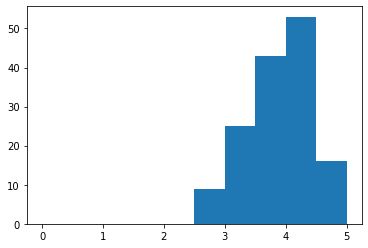

In [28]:
fig, ax = plt.subplots()

ax.hist(norm_reviews['Fandango_Ratingvalue'], range=(0, 5))
plt.show()

We can increase the number of bins from 10 to 20 for improved resolution of the distribution. The length of each bin will be 0.25 (5 / 20) instead of 0.5 (5 / 10). The bins parameter for Axes.hist() is the 2nd positional parameter, but can also be specified as a named parameter:

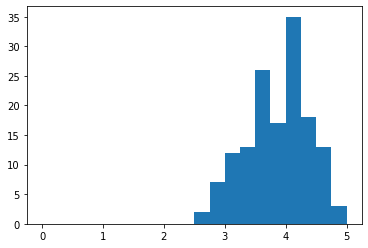

In [29]:
fig, ax = plt.subplots()

ax.hist(norm_reviews['Fandango_Ratingvalue'], range=(0, 5), bins=20)
plt.show()

Let's now generate histograms using 20 bins for all four columns. To ensure that the scales for the y-axis are the same for all histograms, let's set them manually using Axes.set_ylim().

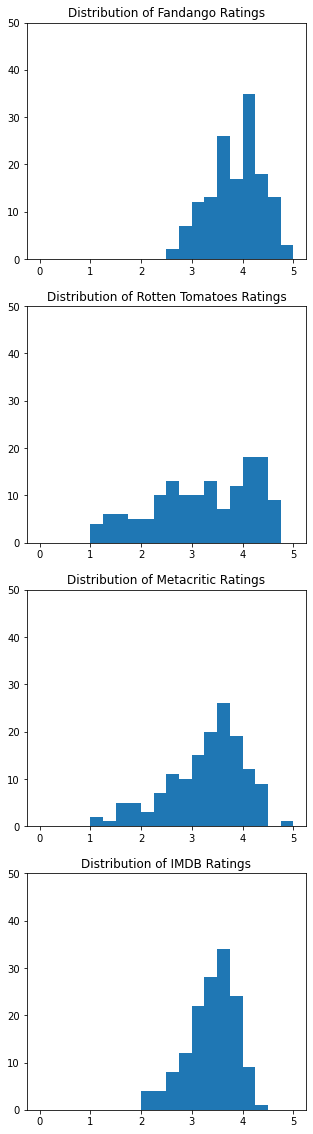

In [30]:
fig = plt.figure(figsize=(5,20))
ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)

ax1.hist(norm_reviews["Fandango_Ratingvalue"], bins=20, range=(0,5))
ax1.set_title("Distribution of Fandango Ratings")
ax1.set_ylim(0, 50)

ax2.hist(norm_reviews["RT_user_norm"], bins=20, range=(0,5))
ax2.set_title("Distribution of Rotten Tomatoes Ratings")
ax2.set_ylim(0, 50)

ax3.hist(norm_reviews["Metacritic_user_nom"], bins=20, range=(0,5))
ax3.set_title("Distribution of Metacritic Ratings")
ax3.set_ylim(0, 50)

ax4.hist(norm_reviews["IMDB_norm"], bins=20, range=(0,5))
ax4.set_title("Distribution of IMDB Ratings")
ax4.set_ylim(0, 50)

plt.show()

Boxplot

A box plot consists of box-and-whisker diagrams, which represents the different quartiles in a visual way.

The two regions contained within the box in the middle make up the interquartile range, or IQR. The IQR is used to measure dispersion of the values. The ratio of the length of the box to the whiskers around the box helps us understand how values in the distribution are spread out.

We can generate a boxplot using Axes.boxplot().

Matplotlib will sort the values, calculate the quartiles that divide the values into four equal regions, and generate the box and whisker diagram.



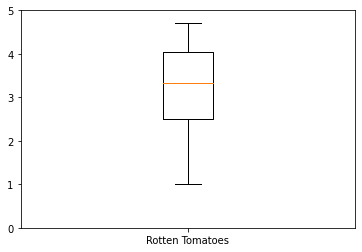

In [31]:
fig, ax = plt.subplots()

ax.boxplot(norm_reviews["RT_user_norm"])
ax.set_ylim(0, 5)
ax.set_xticklabels(["Rotten Tomatoes"])
plt.show()

From the box plot we generated using Rotten Tomatoes ratings, we can conclude that:

the bottom 25% of user ratings range from around 1 to 2.5
the top 25% of of user ratings range from around 4 to 4.6

To compare the lower and upper ranges with those for the other columns, we need to generate multiple box-and-whisker diagrams in the same box plot. When selecting multiple columns to pass in to Axes.boxplot(), we need to use the values accessor to return a multi-dimensional numpy array:

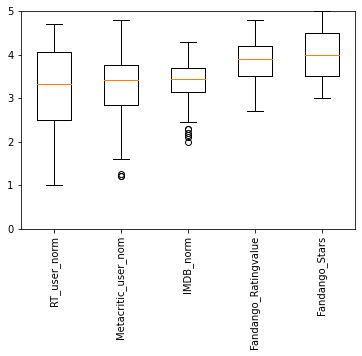

In [32]:
fig, ax = plt.subplots()

num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
ax.boxplot(norm_reviews[num_cols].values)
ax.set_xticklabels(num_cols, rotation=90)
ax.set_ylim(0, 5)
plt.show()

From the boxplot, we can reach the following conclusions:

user ratings from Rotten Tomatoes and Metacritic span a larger range of values
user ratings from IMDB and Fandango are both skewed in the positive direction and span a more constrained range of values

In addition, you may have noticed there are a couple user ratings from both Metacritic and IMDB that are just beyond the boxplot's whiskers. These values are called outliers or extreme values. Outliers are usually treated as abnormal values and affect the overall observation of the data set due to their very high or low values.

In this mission, we learned how to use histograms and box plots to visualize and compare the distributions of the ratings from the four movie review sites. Next in this course is a guided project, where we'll explore how to use pandas with matplotlib effectively and create more complex plots.


### Improving Plot Aesthetics

The Department of Education Statistics releases a data set annually containing the percentage of bachelor's degrees granted to women from 1970 to 2012. The data set is broken up into 17 categories of degrees, with each column as a separate category.

This data set can be used to explore the gender gap in STEM fields.

We'll explore how we can communicate the nuanced narrative of gender gap using effective data visualization




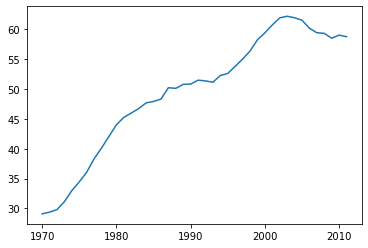

In [33]:
# Generate simple line chart that visualizes the historical percentage of Biology degrees awarded to women:

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
plt.plot(women_degrees['Year'], women_degrees['Biology'])
plt.show()

From the plot, we can tell that Biology degrees increased steadily from 1970 and peaked in the early 2000's. We can also tell that the percentage has stayed above 50% since around 1987. While it's helpful to visualize the trend of Biology degrees awarded to women, it only tells half the story. If we want the gender gap to be apparent and emphasized in the plot, we need a visual analogy to the difference in the percentages between the genders.

If we visualize the trend of Biology degrees awarded to men on the same plot, a viewer can observe the space between the lines for each gender. We can calculate the percentages of Biology degrees awarded to men by subtracting each value in the Biology column from 100. Once we have the male percentages, we can generate two line charts as part of the same diagram.

Let's now create a diagram containing both the line charts we just described.

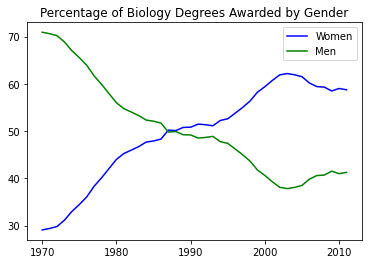

In [34]:
plt.plot(women_degrees['Year'], women_degrees['Biology'], c='blue', label='Women')
plt.plot(women_degrees['Year'], 100 - women_degrees['Biology'], c='green', label='Men')
plt.title('Percentage of Biology Degrees Awarded by Gender')
plt.legend(loc='upper right')
plt.show()

In general, we want to maximize the data-ink ratio, which is the fractional amount of the plotting area dedicated to displaying the data.

Non-data ink includes any elements in the chart that don't directly display data points. This includes tick markers, tick labels, and legends. Data ink includes any elements that display and depend on the data points underlying the chart. In a line chart, data ink would primarily be the lines and in a scatter plot, the data ink would primarily be in the markers. As we increase the data-ink ratio, we decrease non-data ink that can help a viewer understand certain aspects of the plots.

To improve the data-ink ratio, let's make the following changes to the plot we created in the last step:

Remove all of the axis tick marks.
Hide the spines, which are the lines that connects the tick marks, on each axis.



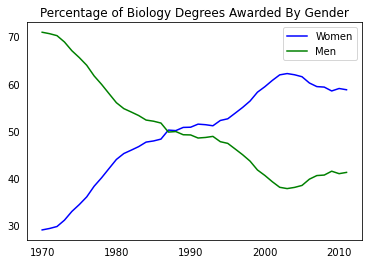

In [35]:
fig, ax = plt.subplots()
ax.plot(women_degrees['Year'], women_degrees['Biology'], c='blue', label='Women')
ax.plot(women_degrees['Year'], 100-women_degrees['Biology'], c='green', label='Men')

ax.tick_params(bottom=False, top=False, left=False, right=False)
ax.set_title('Percentage of Biology Degrees Awarded By Gender')
ax.legend(loc="upper right")

plt.show()

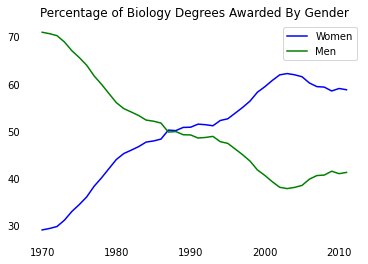

In [36]:
# hide the spines

fig, ax = plt.subplots()
ax.plot(women_degrees['Year'], women_degrees['Biology'], c='blue', label='Women')
ax.plot(women_degrees['Year'], 100-women_degrees['Biology'], c='green', label='Men')
ax.tick_params(bottom=False, top=False, left=False, right=False)
# call the Spine.set_visible() method
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)


ax.legend(loc='upper right')
ax.set_title('Percentage of Biology Degrees Awarded By Gender')
plt.show()

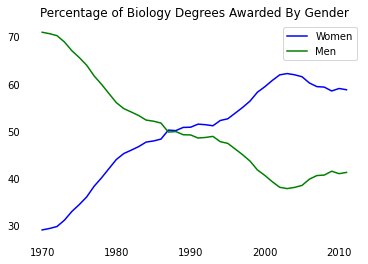

In [37]:
# alternative method:

fig, ax = plt.subplots()
ax.plot(women_degrees['Year'], women_degrees['Biology'], c='blue', label='Women')
ax.plot(women_degrees['Year'], 100-women_degrees['Biology'], c='green', label='Men')
ax.tick_params(bottom=False, top=False, left=False, right=False)
for key,spine in ax.spines.items():
    spine.set_visible(False)
    
ax.set_title('Percentage of Biology Degrees Awarded By Gender')
ax.legend(loc='upper right')
plt.show()

In matplotlib, the spines are represented using the matplotlib.spines.Spine class. When we create an Axes instance, four Spine objects are created for us. If you run print(ax.spines), you'll get back a dictionary of the Spine objects:

In [38]:
print(ax.spines)

OrderedDict([('left', <matplotlib.spines.Spine object at 0x0D006688>), ('right', <matplotlib.spines.Spine object at 0x0C704760>), ('bottom', <matplotlib.spines.Spine object at 0x0C7042F8>), ('top', <matplotlib.spines.Spine object at 0x0C704910>)])


Let's generate line charts for four STEM degree categories on a grid to encourage comparison.

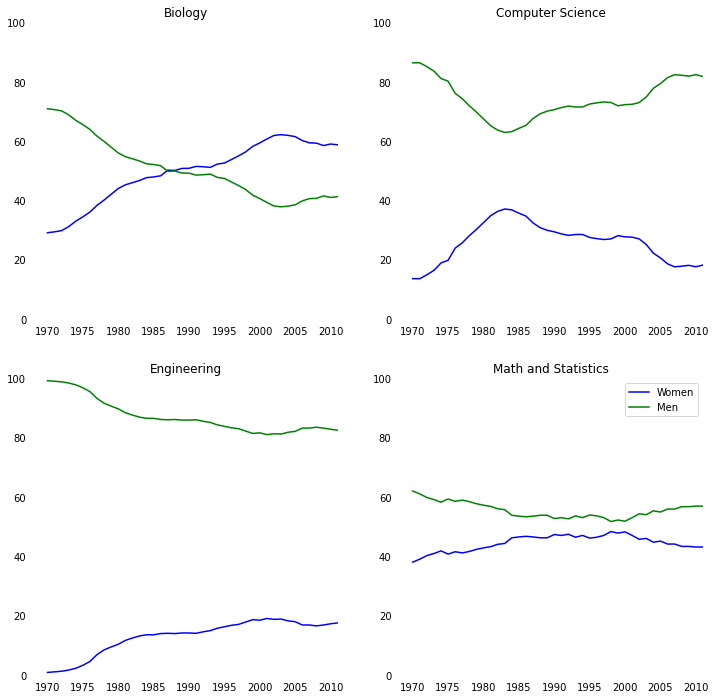

In [39]:
major_cats = ['Biology', 'Computer Science', 'Engineering', 'Math and Statistics']
fig = plt.figure(figsize=(12, 12))

for sp in range(0,4):
    ax = fig.add_subplot(2, 2, sp+1)
    ax.plot(women_degrees['Year'], women_degrees[major_cats[sp]], c = 'blue', label = 'Women')
    ax.plot(women_degrees['Year'], 100 - women_degrees[major_cats[sp]], c = 'green', label = 'Men')
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0, 100)
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_title(major_cats[sp])

# Calling pyplot.legend() here will add the legend to the last subplot that was created.
plt.legend(loc='upper right')
plt.show()

Using the Colour Blind 10 palette.

The Color Blind 10 palette contains ten colors that are colorblind friendly. Let's use the first two colors in the palette for the line colors in our charts.

The first color in the palette is a color that resembles dark blue and has the following RGB values:

Red: 0
Green: 107
Blue: 164

To specify a line color using RGB values, we pass in a tuple of the values to the c parameter when we generate the line chart. Matplotlib expects each value to be scaled down and to range between 0 and 1 (not 0 and 255).


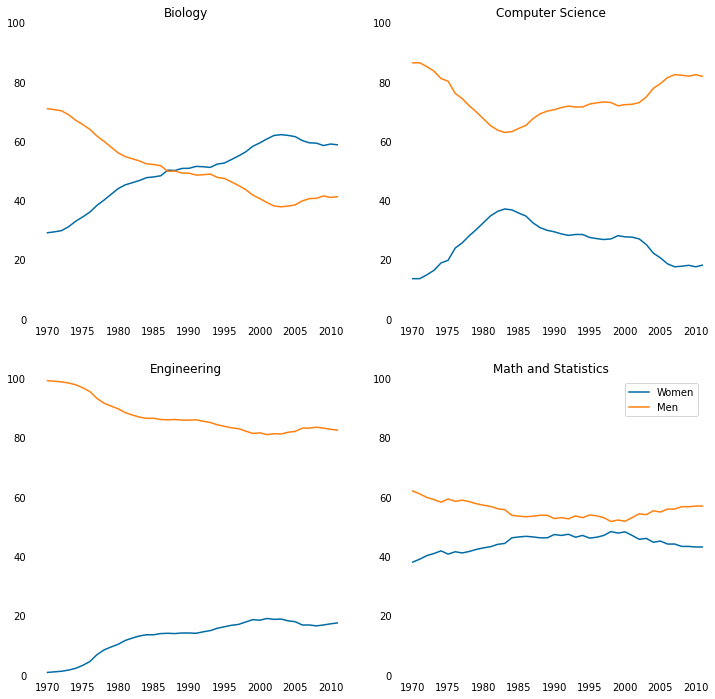

In [40]:
fig = plt.figure(figsize=(12, 12))

for sp in range(0,4):
    ax = fig.add_subplot(2,2,sp+1)
    # The color for each line is assigned here.
    cb_dark_blue = (0/255,107/255,164/255)
    cb_orange = (255/255, 128/255, 14/255)
    ax.plot(women_degrees['Year'], women_degrees[major_cats[sp]], c=cb_dark_blue, label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[sp]], c=cb_orange, label='Men')
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(major_cats[sp])
    ax.tick_params(bottom=False, top=False, left=False, right=False)

plt.legend(loc='upper right')
plt.show()

By default, the actual lines reflecting the underlying data in the line charts we've been generating are quite thin. The white color in the blank area in the line charts is still a dominating color. To emphasize the lines in the plots, we can increase the width of each line. Increasing the line width also improves the data-ink ratio a little bit, because more of the chart area is used to showcase the data.

When we call the Axes.plot() method, we can use the linewidth parameter to specify the line width.

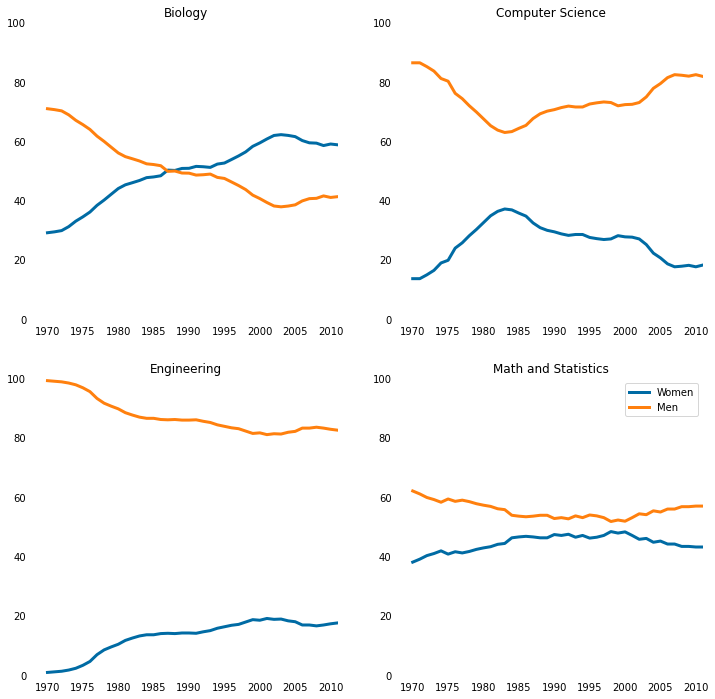

In [41]:
cb_dark_blue = (0/255, 107/255, 164/255)
cb_orange = (255/255, 128/255, 14/255)

fig = plt.figure(figsize=(12, 12))

for sp in range(0,4):
    ax = fig.add_subplot(2,2,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[major_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(major_cats[sp])
    ax.tick_params(bottom=False, top=False, left=False, right=False)

plt.legend(loc='upper right')
plt.show()

Now we will order the charts by decreasing ending gender gap. We will populate the list stem_cats with the six STEM degree categories:

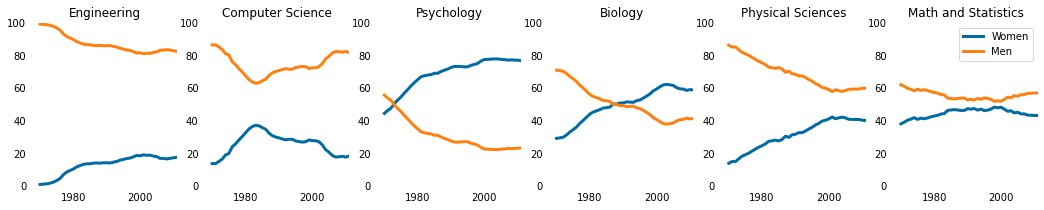

In [42]:
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom=False, top=False, left=False, right=False)

plt.legend(loc='upper right')
plt.show()

The purpose of a legend is to ascribe meaning to symbols or colors in a chart. We're using it to inform the viewer of what gender corresponds to each color. Tufte encourages removing legends entirely if the same information can be conveyed in a cleaner way. Legends consist of non-data ink and take up precious space that could be used for the visualizations themselves (data-ink).

Instead of trying to move the legend to a better location, we can replace it entirely by annotating the lines directly with the corresponding genders.

To add text annotations to a matplotlib plot, we use the Axes.text() method. This method has a few required parameters:

x: x-axis coordinate (as a float)
y: y-axis coordinate (as a float)
s: the text we want in the annotation (as a string value)

The values in the coordinate grid match exactly with the data ranges for the x-axis and the y-axis. If we want to add text at the intersection of 1970 from the x-axis and 0 from the y-axis, we would pass in those values:

ax.text(1970, 0, "starting point")

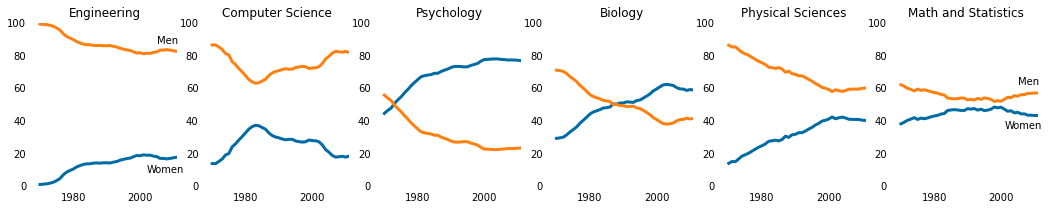

In [43]:
fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    if sp == 0:
        ax.text(2005, 87, "Men")
        ax.text(2002, 8, "Women")
    elif sp == 5:
        ax.text(2005, 62, "Men")
        ax.text(2001, 35, "Women")
plt.show()

So far, we mostly focused on the STEM degrees but now we will generate line charts to compare across all degree categories.

### Comparing across all degree categories

Because there are seventeen degrees that we need to generate line charts for, we'll use a subplot grid layout of 6 rows by 3 columns. We can then group the degrees into STEM, liberal arts, and other, in the following way:

In [44]:
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

While previously, the stem_cats list was ordered by ending gender gap, all three of these lists are ordered in descending order by the percentage of degrees awarded to women. 

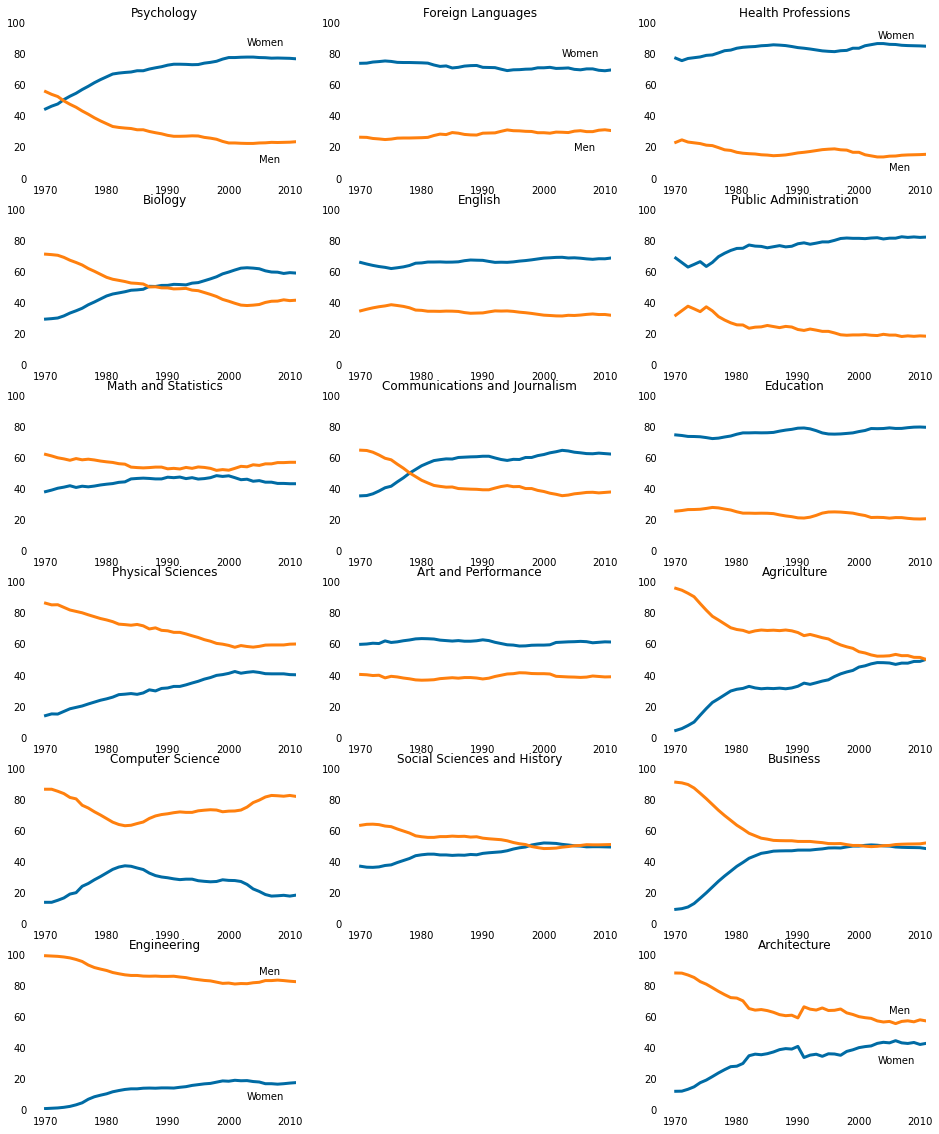

In [45]:
fig = plt.figure(figsize=(16, 20))

## Generate first column of line charts. STEM degrees.
for sp in range(0,18,3):
    cat_index = int(sp/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[cat_index])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    
    if cat_index == 0:
        ax.text(2003, 85, 'Women')
        ax.text(2005, 10, 'Men')
    elif cat_index == 5:
        ax.text(2005, 87, 'Men')
        ax.text(2003, 7, 'Women')

## Generate second column of line charts. Liberal arts degrees.
for sp in range(1,16,3):
    cat_index = int((sp-1)/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(lib_arts_cats[cat_index])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    
    if cat_index == 0:
        ax.text(2003, 78, 'Women')
        ax.text(2005, 18, 'Men')

## Generate third column of line charts. Other degrees.
for sp in range(2,20,3):
    cat_index = int((sp-2)/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(other_cats[cat_index])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    
    if cat_index == 0:
        ax.text(2003, 90, 'Women')
        ax.text(2005, 5, 'Men')
    elif cat_index == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2003, 30, 'Women')
        
plt.show()

### Hiding x-axis labels

With seventeen line charts in one diagram, the non-data elements quickly clutter the field of view. The most immediate issue that sticks out is the titles of some line charts overlapping with the x-axis labels for the line chart above it. If we remove the titles for each line chart, the viewer won't know what degree each line chart refers to. Let's instead remove the x-axis labels for every line chart in a column except for the bottom most one. We can accomplish this by modifying the call to Axes.tick_params() and setting labelbottom to false.

ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom=False)

This will disable the x-axis labels for all of the line charts. You can then enable the x-axis labels for the bottommost line charts in each column:

ax.tick_params(labelbottom=True)




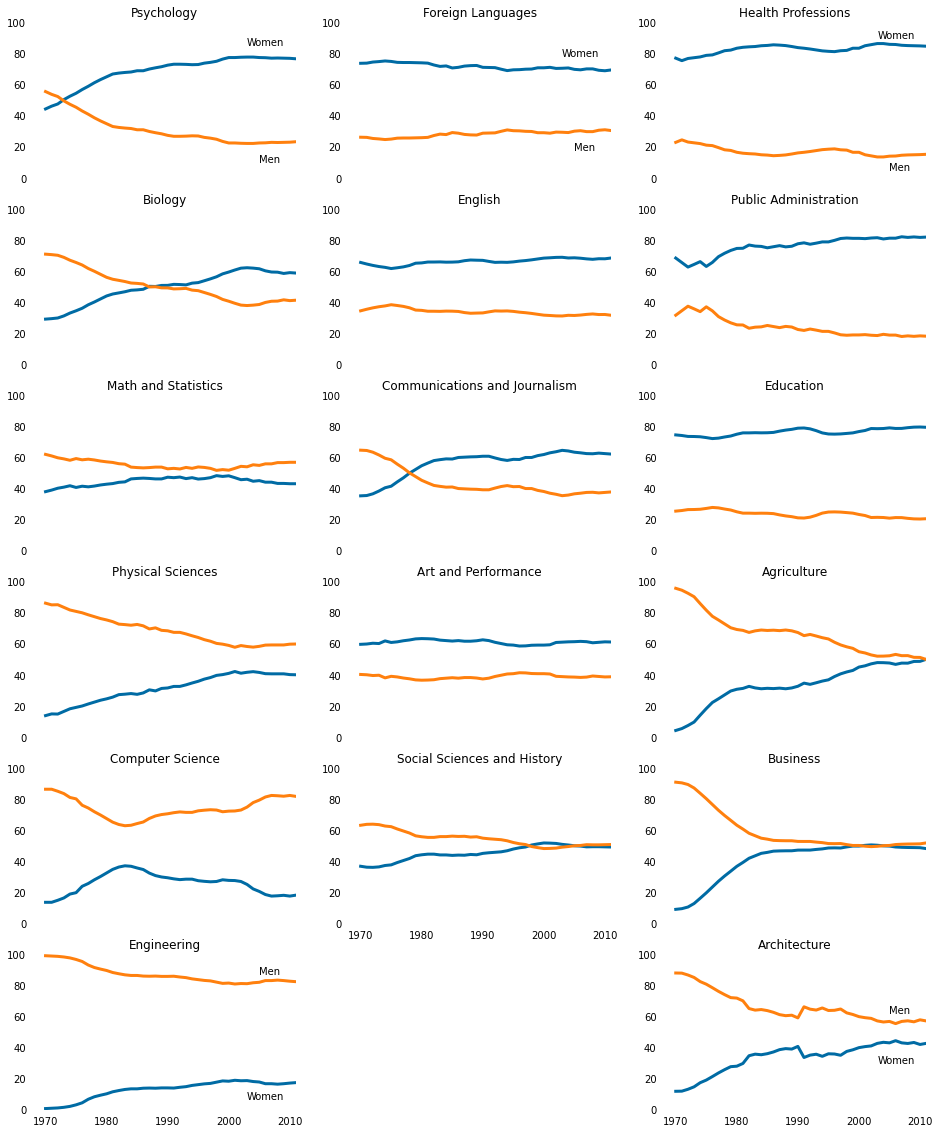

In [46]:
fig = plt.figure(figsize=(16, 20))

## Generate first column of line charts. STEM degrees.
for sp in range(0,18,3):
    cat_index = int(sp/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[cat_index])
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    
    if cat_index == 0:
        ax.text(2003, 85, 'Women')
        ax.text(2005, 10, 'Men')
    elif cat_index == 5:
        ax.text(2005, 87, 'Men')
        ax.text(2003, 7, 'Women')
ax.tick_params(labelbottom=True) # added outside for loop so generated for last chart only
## Generate second column of line charts. Liberal arts degrees.
for sp in range(1,16,3):
    cat_index = int((sp-1)/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(lib_arts_cats[cat_index])
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    
    if cat_index == 0:
        ax.text(2003, 78, 'Women')
        ax.text(2005, 18, 'Men')
ax.tick_params(labelbottom=True) # added outside for loop so generated for last chart only
## Generate third column of line charts. Other degrees.
for sp in range(2,20,3):
    cat_index = int((sp-2)/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(other_cats[cat_index])
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    
    if cat_index == 0:
        ax.text(2003, 90, 'Women')
        ax.text(2005, 5, 'Men')
    elif cat_index == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2003, 30, 'Women')
ax.tick_params(labelbottom=True) # added outside for loop so generated for last chart only      
# above, could also have added ax.tick_params(labelbottom=True) to elif clause at end of each loop

plt.show()

### Setting y-axis labels

Removing the x-axis labels for all but the bottommost plots solved the issue we noticed with the overlapping text. In addition, the plots are cleaner and more readable. The trade-off we made is that it's now more difficult for the viewer to discern approximately which years some interesting changes in trends may have happened. This is acceptable because we're primarily interested in enabling the viewer to quickly get a high level understanding of which degrees are prone to gender imbalance and how that has changed over time.

let's also simplify the y-axis labels. Currently, all seventeen plots have six y-axis labels and even though they are consistent across the plots, they still add to the visual clutter. By keeping just the starting and ending labels (0 and 100), we can keep some of the benefits of having the y-axis labels to begin with.

We can use the Axes.set_yticks() method to specify which labels we want displayed:


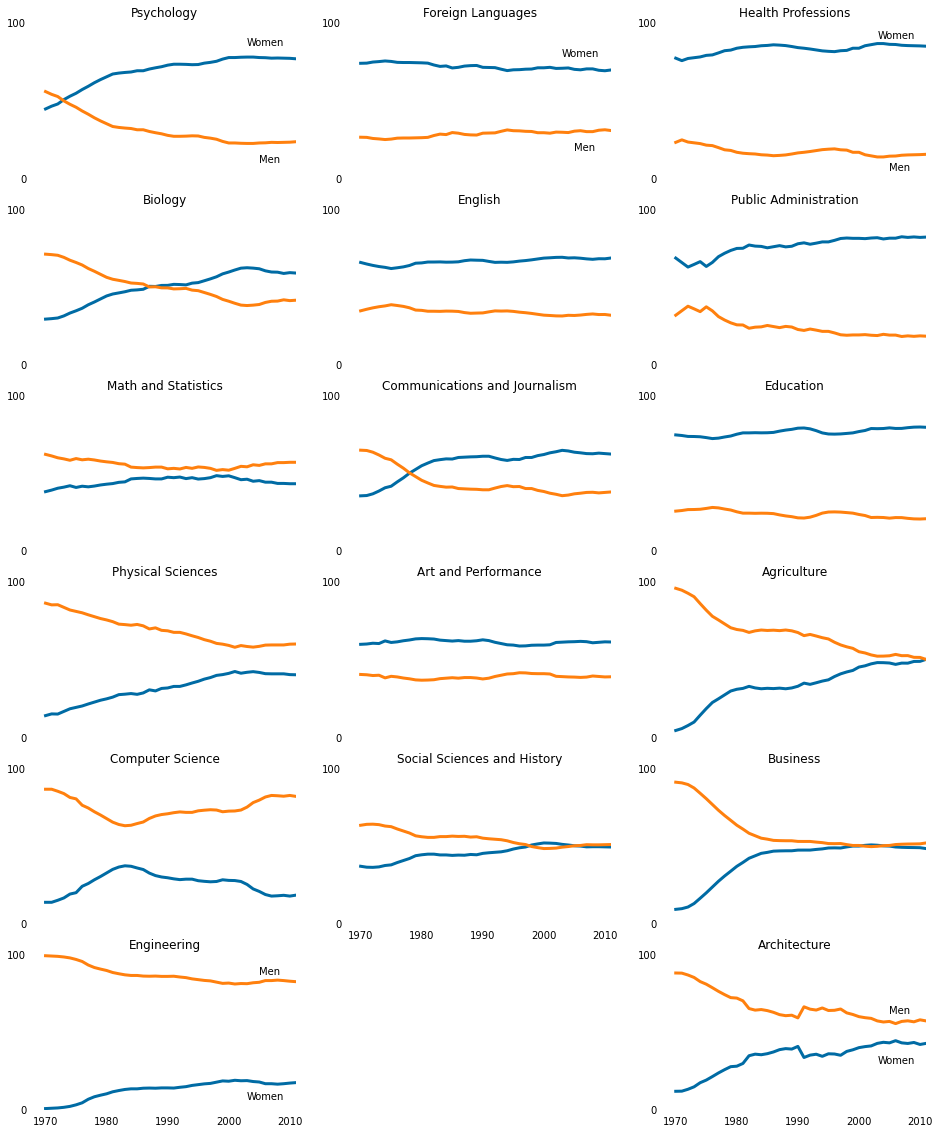

In [47]:
fig = plt.figure(figsize=(16, 20))

## Generate first column of line charts. STEM degrees.
for sp in range(0,18,3):
    cat_index = int(sp/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0,100]) # sets y-axis tick labels
    ax.set_title(stem_cats[cat_index])
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    
    if cat_index == 0:
        ax.text(2003, 85, 'Women')
        ax.text(2005, 10, 'Men')
    elif cat_index == 5:
        ax.text(2005, 87, 'Men')
        ax.text(2003, 7, 'Women')
ax.tick_params(labelbottom=True) # added outside for loop so generated for last chart only
## Generate second column of line charts. Liberal arts degrees.
for sp in range(1,16,3):
    cat_index = int((sp-1)/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0,100])
    ax.set_title(lib_arts_cats[cat_index])
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    
    if cat_index == 0:
        ax.text(2003, 78, 'Women')
        ax.text(2005, 18, 'Men')
ax.tick_params(labelbottom=True) # added outside for loop so generated for last chart only
## Generate third column of line charts. Other degrees.
for sp in range(2,20,3):
    cat_index = int((sp-2)/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0,100])
    ax.set_title(other_cats[cat_index])
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    
    if cat_index == 0:
        ax.text(2003, 90, 'Women')
        ax.text(2005, 5, 'Men')
    elif cat_index == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2003, 30, 'Women')
ax.tick_params(labelbottom=True) # added outside for loop so generated for last chart only      
plt.show()

### Adding a horizontal line

While removing most of the y-axis labels definitely reduced clutter, it also made it hard to understand which degrees have close to 50-50 gender breakdown. While keeping all of the y-axis labels would have made it easier, we can actually do one better and use a horizontal line across all of the line charts where the y-axis label 50 would have been.

We can generate a horizontal line across an entire subplot using the Axes.axhline() method. The only required parameter is the y-axis location for the start of the line.

ax.axhline(50)

We will use the next color in the Color Blind 10 palette for this horizontal line, which has an RGB value of (171, 171, 171). Because we don't want this line to clutter the viewing experience, let's increase the transparency of the line. We can set the color using the c parameter and the transparency using the alpha parameter. The value passed in to the alpha parameter must range between 0 and 1:

ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)


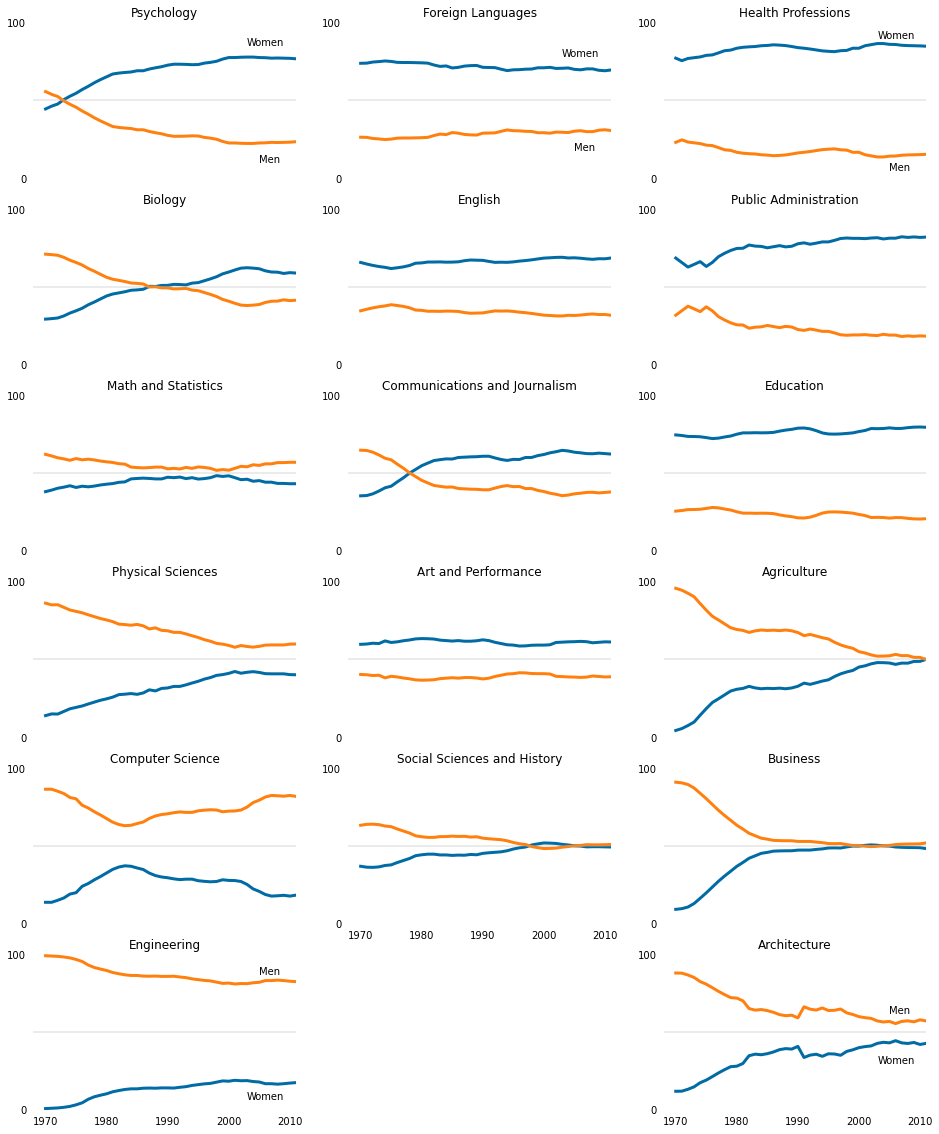

In [48]:
fig = plt.figure(figsize=(16, 20))

## Generate first column of line charts. STEM degrees.
for sp in range(0,18,3):
    cat_index = int(sp/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0,100]) # sets y-axis tick labels
    ax.set_title(stem_cats[cat_index])
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    
    if cat_index == 0:
        ax.text(2003, 85, 'Women')
        ax.text(2005, 10, 'Men')
    elif cat_index == 5:
        ax.text(2005, 87, 'Men')
        ax.text(2003, 7, 'Women')
ax.tick_params(labelbottom=True) # added outside for loop so generated for last chart only
## Generate second column of line charts. Liberal arts degrees.
for sp in range(1,16,3):
    cat_index = int((sp-1)/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0,100])
    ax.set_title(lib_arts_cats[cat_index])
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    
    if cat_index == 0:
        ax.text(2003, 78, 'Women')
        ax.text(2005, 18, 'Men')
ax.tick_params(labelbottom=True) # added outside for loop so generated for last chart only
## Generate third column of line charts. Other degrees.
for sp in range(2,20,3):
    cat_index = int((sp-2)/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0,100])
    ax.set_title(other_cats[cat_index])
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    
    if cat_index == 0:
        ax.text(2003, 90, 'Women')
        ax.text(2005, 5, 'Men')
    elif cat_index == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2003, 30, 'Women')
ax.tick_params(labelbottom=True) # added outside for loop so generated for last chart only      
plt.show()

### Exporting to a file

We can use Figure.savefig() or pyplot.savefig() to export all of the plots contained in the figure as a single image file. Note that these have to be called before we display the figure using pyplot.show()


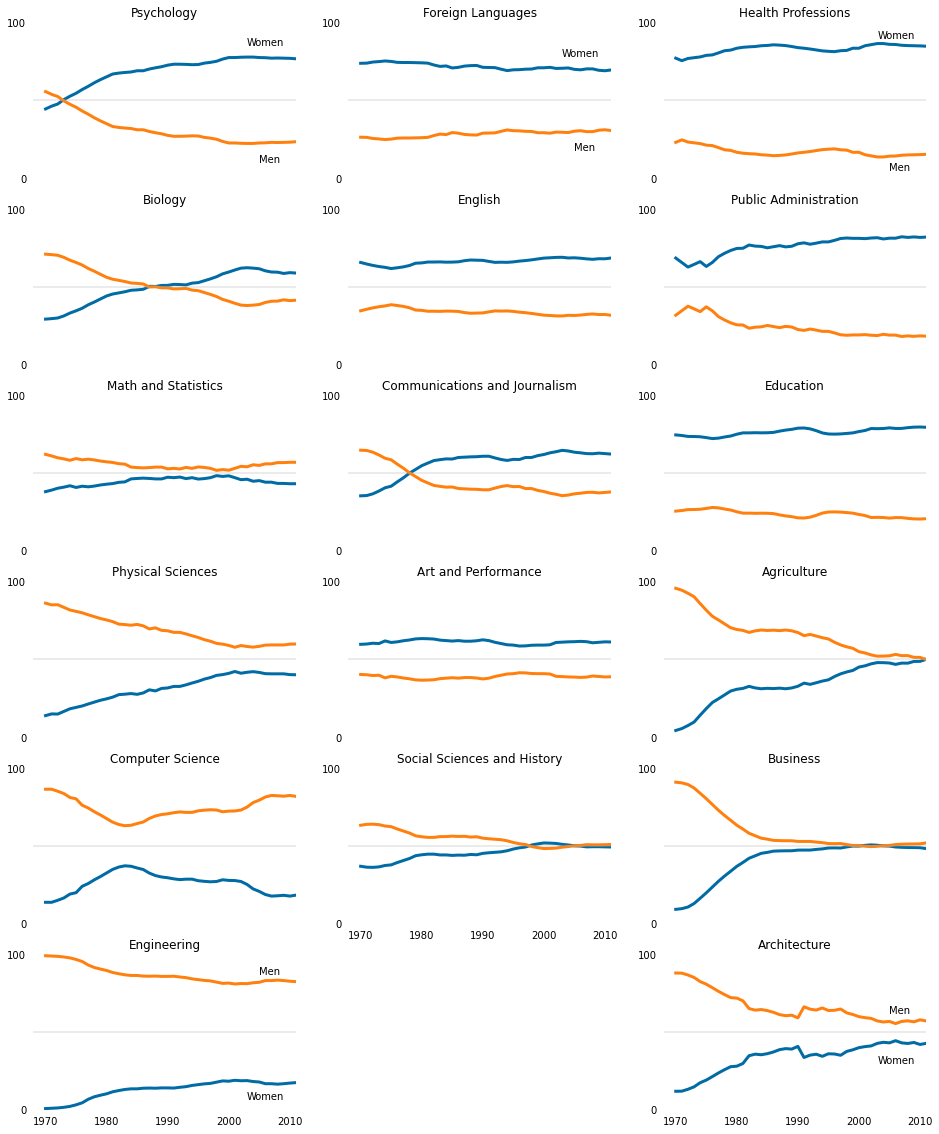

In [49]:
fig = plt.figure(figsize=(16, 20))

## Generate first column of line charts. STEM degrees.
for sp in range(0,18,3):
    cat_index = int(sp/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0,100]) # sets y-axis tick labels
    ax.set_title(stem_cats[cat_index])
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    
    if cat_index == 0:
        ax.text(2003, 85, 'Women')
        ax.text(2005, 10, 'Men')
    elif cat_index == 5:
        ax.text(2005, 87, 'Men')
        ax.text(2003, 7, 'Women')
ax.tick_params(labelbottom=True) # added outside for loop so generated for last chart only
## Generate second column of line charts. Liberal arts degrees.
for sp in range(1,16,3):
    cat_index = int((sp-1)/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0,100])
    ax.set_title(lib_arts_cats[cat_index])
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    
    if cat_index == 0:
        ax.text(2003, 78, 'Women')
        ax.text(2005, 18, 'Men')
ax.tick_params(labelbottom=True) # added outside for loop so generated for last chart only
## Generate third column of line charts. Other degrees.
for sp in range(2,20,3):
    cat_index = int((sp-2)/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0,100])
    ax.set_title(other_cats[cat_index])
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    
    if cat_index == 0:
        ax.text(2003, 90, 'Women')
        ax.text(2005, 5, 'Men')
    elif cat_index == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2003, 30, 'Women')
ax.tick_params(labelbottom=True) # added outside for loop so generated for last chart only

# Export file before calling pyplot.show()
fig.savefig("gender_degrees.png")
plt.show()

## Seaborn

### Condtional Plots

We'll now explore how to quickly create multiple plots that are subsetted using one or more conditions.
We'll be working with the seaborn visualization library, which is built on top of matplotlib.

We'll be working with a data set of the passengers of the Titanic. The data set was compiled by Kaggle for their introductory data science competition, called Titanic: Machine Learning from Disaster. The data for the passengers is contained in two files:

train.csv: Contains data on 712 passengers
test.csv: Contains data on 418 passengers

Each row in both data sets represents a passenger on the Titanic, and some information about them. We'll be working with the train.csv file, because the Survived column, which describes if a given passenger survived the crash, is preserved in the file.

Let's first remove columns like Name and Ticket that we don't have a way to visualize. In addition, we need to remove any rows containing missing values, as seaborn will throw errors when we try to plot missing values.


In [50]:
titanic = pd.read_csv("train.csv")

titanic = titanic[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']].dropna()

titanic.head(10)

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0          0       3    male  22.0      1      0   7.2500        S
1          1       1  female  38.0      1      0  71.2833        C
2          1       3  female  26.0      0      0   7.9250        S
3          1       1  female  35.0      1      0  53.1000        S
4          0       3    male  35.0      0      0   8.0500        S
6          0       1    male  54.0      0      0  51.8625        S
7          0       3    male   2.0      3      1  21.0750        S
8          1       3  female  27.0      0      2  11.1333        S
9          1       2  female  14.0      1      0  30.0708        C
10         1       3  female   4.0      1      1  16.7000        S

In [51]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 44.5+ KB


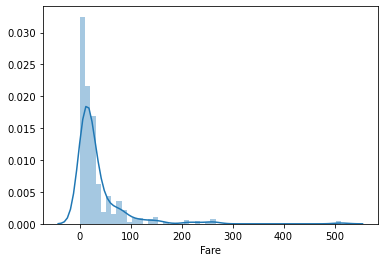

In [52]:
# start by creating a histogram. We can generate a histogram of the Fare column using the seaborn.distplot() function:
import seaborn as sns
sns.distplot(titanic['Fare'])
plt.show()
# seaborn uses a technique called kernel density estimation, or KDE for short, to create a smoothed line chart over the histogram
# the resulting line is a smoother version of the histogram, called a kernel density plot

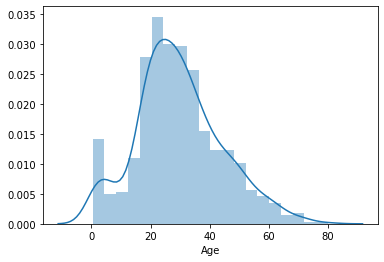

In [53]:
# another example
sns.distplot(titanic['Age'])
plt.show()

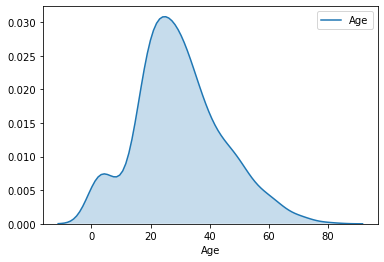

In [54]:
# generating a kernal density plot
# to generate just the kernel density plot, we use the seaborn.kdeplot() function:

# sns.kdeplot(titanic["Age"])
# we can shade the area under the line using a single color. By setting the shade parameter to True
sns.kdeplot(titanic['Age'], shade=True)
plt.xlabel('Age')
plt.show()

We can use the seaborn.set_style() function to change the default seaborn style sheet

Seaborn comes with a few style sheets:

darkgrid: Coordinate grid displayed, dark background color

whitegrid: Coordinate grid displayed, white background color

dark: Coordinate grid hidden, dark background color

white: Coordinate grid hidden, white background color

ticks: Coordinate grid hidden, white background color, ticks visible




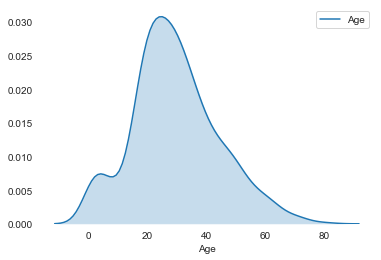

In [55]:
sns.set_style("white")

sns.kdeplot(titanic['Age'], shade=True)
plt.xlabel('Age')
# remove the axis spines for the top and right axes, we use the seaborn.despine() function
# need to set the left and bottom parameters to True, to despine all axes
sns.despine(left=True, bottom=True)
plt.show()

#### Conditional Distributions Using a Single Condition

Previously, we created a small multiple, which is a group of plots that have the same axis scales so the viewer can compare plots effectively. We accomplished this by subsetting the data manually and generating a plot using matplotlib for each one.

In seaborn, we can create a small multiple by specifying the conditioning criteria and the type of data visualization we want. For example, we can visualize the differences in age distributions between passengers who survived and those who didn't by creating a pair of kernel density plots. One kernel density plot would visualize the distribution of values in the "Age" column where Survived equalled 0 and the other would visualize the distribution of values in the "Age" column where Survived equalled 1.

For example:

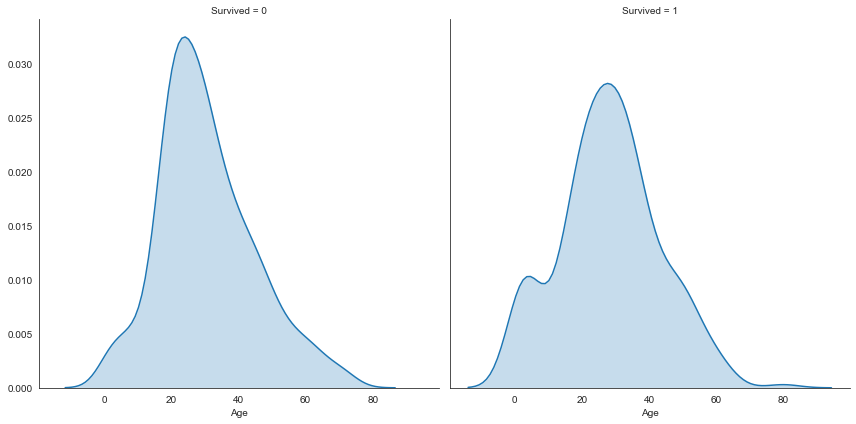

In [56]:
# Condition on unique values of the "Survived" column.
g = sns.FacetGrid(titanic, col="Survived", size=6)
# For each subset of values, generate a kernel density plot of the "Age" columns.
g.map(sns.kdeplot, "Age", shade=True)

The seaborn.FacetGrid object is used to represent the layout of the plots in the grid and the columns used for subsetting the data. 

Setting the col parameter to "Survived" specifies a separate plot for each unique value in the Survived column. Setting the size parameter to 6 specifies a height of 6 inches for each plot.

Once we've created the grid, we use the FacetGrid.map() method to specify the plot we want for each unique value of Survived. Seaborn generated one kernel density plot for the ages of passengers that survived and one kernel density plot for the ages of passengers that didn't survive.

The function that's passed into FacetGrid.map() has to be a valid matplotlib or seaborn function. For example, we can map matplotlib histograms to the grid:


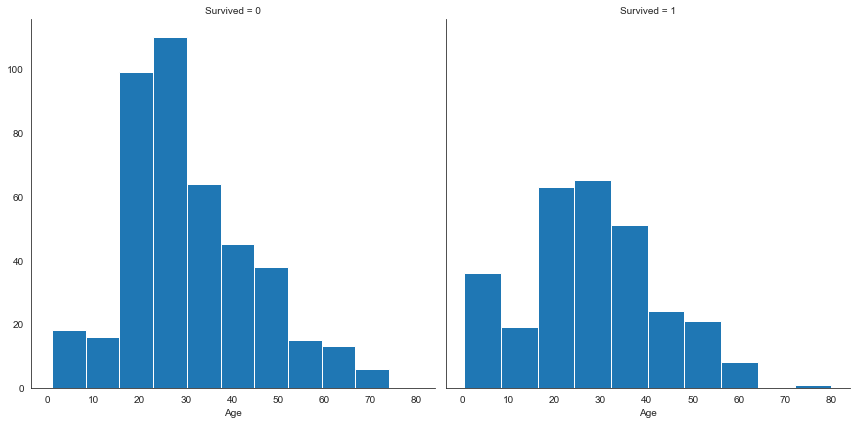

In [57]:
g = sns.FacetGrid(titanic, col="Survived", size=6)
g.map(plt.hist, "Age")

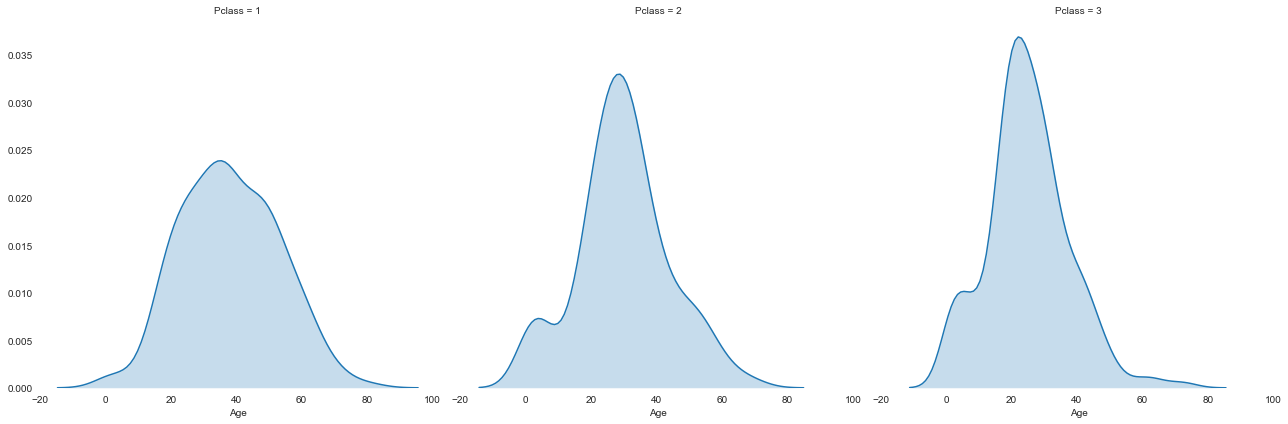

In [58]:
# another example
g = sns.FacetGrid(titanic, col="Pclass", size=6)
g.map(sns.kdeplot, "Age", shade=True)
g.despine(left=True, bottom=True)
plt.show()

We can use two conditions to generate a grid of plots, each containing a subset of the data with a unique combination of each condition. When creating a FacetGrid, we use the row parameter to specify the column in the dataframe we want used to subset across the rows in the grid. 

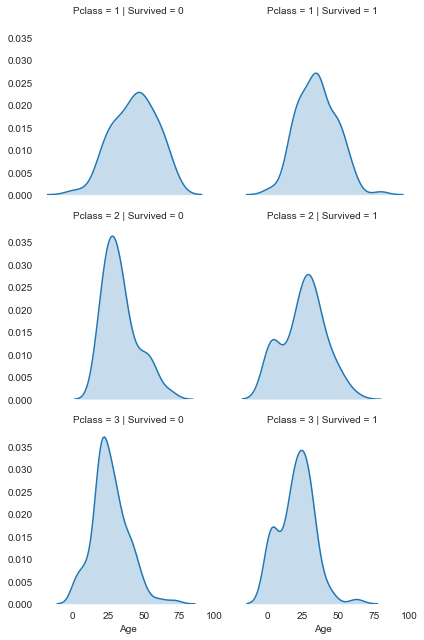

In [59]:
g = sns.FacetGrid(titanic, col="Survived", row="Pclass")
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)
plt.show()

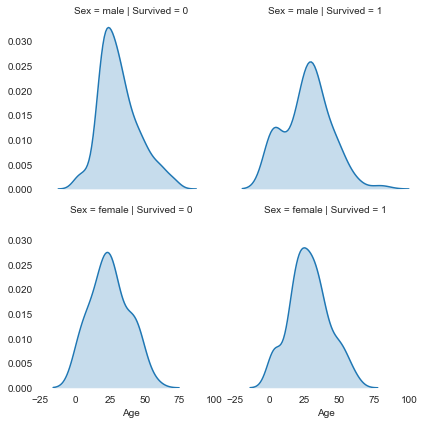

In [60]:
# another example of two conditions
g = sns.FacetGrid(titanic, col="Survived", row="Sex")
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)
plt.show()

When subsetting data using two conditions, the rows in the grid represented one condition while the columns represented another. We can express a third condition by generating multiple plots on the same subplot in the grid and color them differently. Thankfully, we can add a condition just by setting the hue parameter to the column name from the dataframe.


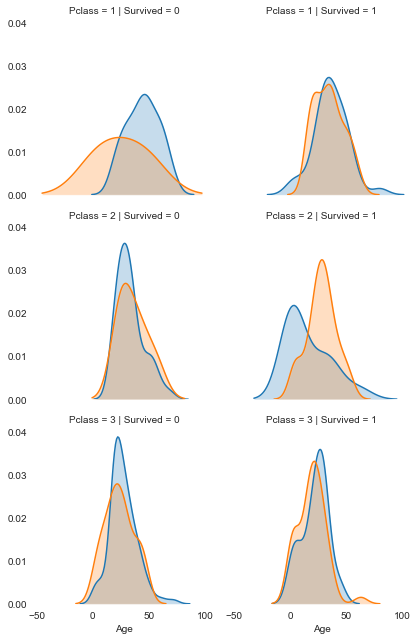

In [61]:
g = sns.FacetGrid(titanic, col="Survived", row="Pclass", hue="Sex", size=3)
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)
plt.show()

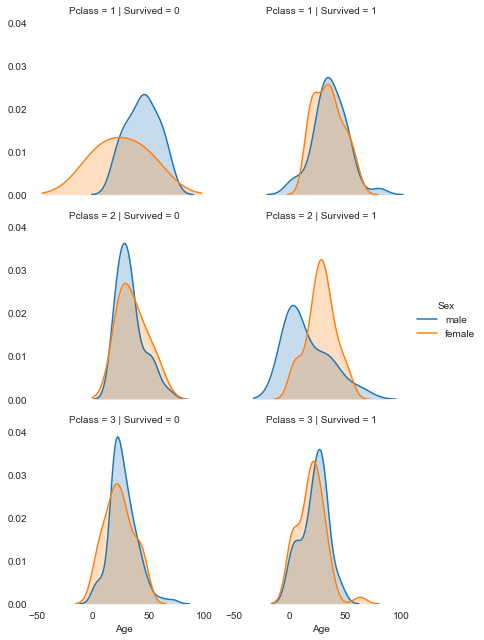

In [62]:
# add legend
g = sns.FacetGrid(titanic, col="Survived", row="Pclass", hue="Sex", size=3)
g.map(sns.kdeplot, "Age", shade=True).add_legend()
sns.despine(left=True, bottom=True)
plt.show()


## Visualising Geographical Data

### Some brief notes on mapping geographical data:

A geographic coordinate system allows us to locate any point on Earth using latitude and longitude coordinates.

In most cases, we want to visualize latitude and longitude points on two-dimensional maps. Two-dimensional maps are faster to render, easier to view on a computer and distribute, and are more familiar to the experience of popular mapping software like Google Maps. Latitude and longitude values describe points on a sphere, which is three-dimensional. To plot the values on a two-dimensional plane, we need to convert the coordinates to the Cartesian coordinate system using a map projection.

A map projection transforms points on a sphere to a two-dimensional plane. When projecting down to the two-dimensional plane, some properties are distorted. Each map projection makes trade-offs in what properties to preserve. We'll use the Mercator projection, because it is commonly used by popular mapping software.

Basemap is an extension to Matplotlib that makes it easier to work with geographic data. The documentation for basemap provides a good high-level overview of what the library does:

The matplotlib basemap toolkit is a library for plotting 2D data on maps in Python. Basemap does not do any plotting on its own, but provides the facilities to transform coordinates to one of 25 different map projections.

Basemap makes it easy to convert from the spherical coordinate system (latitudes & longitudes) to the Mercator projection. While basemap uses Matplotlib to actually draw and control the map, the library provides many methods that enable us to work with maps quickly. 

To build interactive maps, use Folium: http://python-visualization.github.io/folium/index.html

